In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import balanced_accuracy_score
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute


In [9]:
def plot_array(array, color='blue'):
    if not color == 'blue':
        if color == 1:
            color = 'green'
        else:
            color = 'red'
    plt.figure(figsize=(15, 2))
    plt.plot(array, color=color)
    plt.show()
    
def plot2D_array(array):
    plt.imshow(array, cmap='hot', interpolation='nearest')
    plt.show()

def append_zero_to_each_row(arr):
    zeros = np.zeros((arr.shape[0], 1))
    return np.hstack((arr, zeros))

def plot_arrays(arrays):
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
    plt.figure(figsize=(15, 2))
    for i, array in enumerate(arrays):
        plt.plot(array, color=colors[i % len(colors)])
    plt.show()

In [48]:
df_train = pd.read_csv('data/ptbdb_train.csv')
df_test = pd.read_csv('data/ptbdb_test.csv')
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values
X_train = append_zero_to_each_row(X_train)
X_test = append_zero_to_each_row(X_test)
X_train.shape, X_test.shape

((11640, 188), (2910, 188))

In [11]:
# idx | time | value
#
#
# 3*(11640*188)

x_train_feature_extract = []
for i in range(len(X_train)):
    for j in range(len(X_train[i])):
        x_train_feature_extract.append([i, j, X_train[i][j]])
x_train_feature_extract = np.array(x_train_feature_extract)
df_train_feature_extract = pd.DataFrame(x_train_feature_extract, columns=['id', 'time', 'value'])

x_test_feature_extract = []
for i in range(len(X_test)):
    for j in range(len(X_test[i])):
        x_test_feature_extract.append([i, j, X_test[i][j]])
x_test_feature_extract = np.array(x_test_feature_extract)
df_test_feature_extract = pd.DataFrame(x_test_feature_extract, columns=['id', 'time', 'value'])


In [12]:
X_train_extracted_features = pd.read_csv('data/X_train_extracted_features.csv')

X_test_extracted_features = pd.read_csv('data/X_test_extracted_features.csv')


In [47]:
impute(X_train_extracted_features)
impute(X_test_extracted_features)

X_train_features_filtered = select_features(X_train_extracted_features, y_train)
X_test_features_filtered = select_features(X_test_extracted_features, y_test)

In [53]:
X_train_features_filtered

,value__fourier_entropy__bins_100,"value__cwt_coefficients__coeff_12__w_10__widths_(2, 5, 10, 20)","value__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""var""",value__fourier_entropy__bins_10,"value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","value__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_11__w_10__widths_(2, 5, 10, 20)","value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.4",...,"value__fft_coefficient__attr_""real""__coeff_62","value__fft_coefficient__attr_""imag""__coeff_91","value__fft_coefficient__attr_""imag""__coeff_80","value__agg_linear_trend__attr_""rvalue""__chunk_len_50__f_agg_""min""",value__number_crossing_m__m_0,"value__fft_coefficient__attr_""imag""__coeff_86","value__fft_coefficient__attr_""real""__coeff_76","value__fft_coefficient__attr_""imag""__coeff_89","value__fft_coefficient__attr_""abs""__coeff_7","value__fft_coefficient__attr_""abs""__coeff_63"
0,1.290456,-0.225300,0.000352,0.174882,0.000690,0.030085,0.001586,0.459462,-0.179592,0.000599,...,0.471698,-0.073318,-0.078030,-0.774597,3.0,0.017894,0.969450,-0.036938,3.554001,1.509581
1,2.595198,-0.239690,0.000358,1.267474,0.000014,0.004686,0.000036,0.588406,-0.176441,0.000045,...,0.521331,-0.078141,-0.185498,-0.939336,3.0,-0.024488,0.567742,-0.098302,6.142286,0.756262
2,2.202847,-0.250276,0.000380,0.861543,0.000071,0.012036,0.000216,0.607694,-0.193172,0.000152,...,0.952634,-0.064871,-0.313600,-0.258199,3.0,-0.044456,0.824019,-0.119962,0.958727,0.534747
3,1.675391,0.442803,0.000418,0.479573,0.000023,0.006329,0.000063,0.535660,0.454100,0.000031,...,0.049359,0.308762,-0.334743,-0.448480,3.0,0.091620,0.475704,-0.370071,1.819067,1.258550
4,2.287860,0.002883,0.000264,0.915860,0.000051,0.010951,0.000170,0.457598,0.075607,0.000051,...,1.194356,0.286098,-0.270648,0.000000,3.0,0.284153,0.485592,0.104373,3.867190,0.315049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,1.942941,0.626868,0.000253,0.663366,0.000019,0.005404,0.000048,0.412693,0.697181,0.000033,...,0.306952,0.187793,0.031433,-0.032437,3.0,0.009836,0.530287,-0.201707,2.526276,0.734522
11636,1.514694,0.164559,0.000266,0.174882,0.000210,0.026671,0.000912,0.507390,0.234147,0.000317,...,0.705657,0.015155,-0.234956,-0.774597,3.0,-0.179055,-0.065657,-0.156226,1.386213,0.646261
11637,1.345437,-0.116950,0.000470,0.174882,0.000242,0.023587,0.000791,0.646129,-0.113702,0.001485,...,-0.115989,0.199799,-0.764878,-0.258199,3.0,-0.336449,1.420308,0.184360,1.926720,1.458057
11638,2.526907,0.035412,0.000367,0.877540,0.000086,0.012301,0.000237,0.538231,0.065473,0.000151,...,0.805669,-0.302696,-0.026336,-0.774597,3.0,0.066837,0.428300,-0.237441,3.096940,0.687518


In [62]:
cols = X_test_features_filtered.columns
X_train_features = X_train_extracted_features[cols].values
X_test_features = X_test_extracted_features[cols].values
'''X_train_with_features = np.concatenate((X_train, X_train_features), axis=1)
X_test_with_features = np.concatenate((X_test, X_test_features), axis=1)'''
X_train_with_features = X_train_features
X_test_with_features = X_test_features
X_train_with_features.shape, X_test_with_features.shape

((11640, 461), (2910, 461))

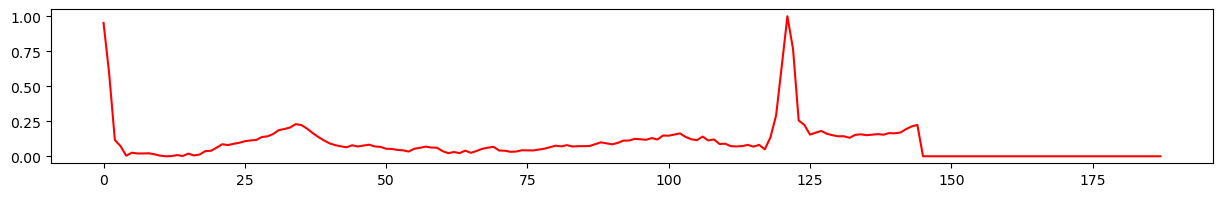

In [61]:
idx = 2
plot_array(X_train[idx], y_train[idx])

In [15]:
cls_0 = np.count_nonzero(y_train == 0)
cls_1 = np.count_nonzero(y_train == 1)
print(f'Class zero samples: {cls_0}, Class one samples: {cls_1}')
print('Based on this information, we can see that the dataset is imbalanced. We use balanced accuracy as metric.')

Class zero samples: 3237, Class one samples: 8403
Based on this information, we can see that the dataset is imbalanced. We use balanced accuracy as metric.


In [16]:
svm_clf_no_features = svm.SVC()
svm_clf_no_features.fit(X_train, y_train)

svm_preds = svm_clf_no_features.predict(X_test)
svm_acc_no_features = balanced_accuracy_score(y_test, svm_preds)
print(f'SVM balanced accuracy: {svm_acc_no_features}')

rf_clf_no_features = RandomForestClassifier()
rf_clf_no_features.fit(X_train, y_train)

rf_preds = rf_clf_no_features.predict(X_test)
rf_acc_no_features = balanced_accuracy_score(y_test, rf_preds)
print(f'Random Forest balanced accuracy: {rf_acc_no_features}')

SVM balanced accuracy: 0.8813936043937409
Random Forest balanced accuracy: 0.9520223549471979


In [63]:
svm_clf_with_features = svm.SVC()
svm_clf_with_features.fit(X_train_with_features, y_train)

svm_features_preds = svm_clf_with_features.predict(X_test_with_features)
svm_acc_with_features = balanced_accuracy_score(y_test, svm_features_preds)
print(f'SVM with features balanced accuracy: {svm_acc_with_features}')

rf_clf_with_features = RandomForestClassifier()
rf_clf_with_features.fit(X_train_with_features, y_train)

rf_features_preds = rf_clf_with_features.predict(X_test_with_features)
rf_acc_with_features = balanced_accuracy_score(y_test, rf_features_preds)
print(f'Random Forest with features balanced accuracy: {rf_acc_with_features}')

SVM with features balanced accuracy: 0.805757246752268
Random Forest with features balanced accuracy: 0.9617302239262937


In [17]:
df_train['id'] = range(len(df_train))
X_train.shape

(11640, 188)

In [18]:
#extracted_feautures = extract_features(df_train, column_id='id')

RNNs

In [19]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader


In [20]:
def train_model(model, dataloader, epochs):
    # Define the loss function and the optimizer
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters())
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Move the model to the device
    model = model.to(device)
    model.train()
    # Loop over the epochs
    for epoch in range(epochs):
        for inputs, targets in dataloader:
            # Move inputs and targets to the device
            inputs, targets = inputs.to(device), targets.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs).squeeze()

            # Compute the loss
            loss = criterion(outputs, targets)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch+1}/{epochs} Loss: {loss.item()}')
        
def train_model_transformer(model, dataloader, epochs):
    # Define the loss function and the optimizer
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters())
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Move the model to the device
    model = model.to(device)
    model.train()
    # Loop over the epochs
    for epoch in range(epochs):
        for inputs, targets in dataloader:
            # Move inputs and targets to the device
            inputs, targets = inputs.to(device), targets.to(device)
            inputs = inputs.unsqueeze(-1)
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs).prediction_logits.squeeze()

            # Compute the loss
            loss = criterion(outputs, targets)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch+1}/{epochs} Loss: {loss.item()}')
        
def create_dataloader(X, y, batch_size=32):
    # Convert X and y to PyTorch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)

    # Wrap them in a TensorDataset
    dataset = TensorDataset(X_tensor, y_tensor)

    # Create a DataLoader
    dataloader = DataLoader(dataset, batch_size=batch_size)

    return dataloader

def get_predictions(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    predictions = []

    with torch.no_grad():  # No need to track gradients
        for inputs, _ in dataloader:
            outputs = model(inputs)
            predictions.extend(outputs.detach().numpy())
    for i in range(len(predictions)):
        if predictions[i] > 0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0

    return np.array(predictions)

def get_predictions_transformer(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    predictions = []

    with torch.no_grad():  # No need to track gradients
        for inputs, _ in dataloader:
            inputs = inputs.unsqueeze(-1)
            outputs = model(inputs)
            predictions.extend(outputs.prediction_logits.detach().numpy())
    for i in range(len(predictions)):
        if predictions[i] > 0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0

    return np.array(predictions)

In [21]:
class RNNModel_uni(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel_uni, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc1(out)
        return out

In [22]:
rnn_uni = RNNModel_uni(input_size=188, hidden_size=20, output_size=1)

train_loader = create_dataloader(X_train, y_train)
test_loader = create_dataloader(X_test, y_test)

In [23]:
train_model(rnn_uni, train_loader, epochs=10)

Epoch 1/10 Loss: 0.5741513967514038
Epoch 2/10 Loss: 0.5633238554000854
Epoch 3/10 Loss: 0.544334888458252
Epoch 4/10 Loss: 0.5226104259490967
Epoch 5/10 Loss: 0.4999316930770874
Epoch 6/10 Loss: 0.4766555726528168
Epoch 7/10 Loss: 0.4540957808494568
Epoch 8/10 Loss: 0.4335215985774994
Epoch 9/10 Loss: 0.41547101736068726
Epoch 10/10 Loss: 0.3997492790222168


In [24]:
preds_rnn = get_predictions(rnn_uni.to('cpu'), test_loader)
rnn_uni_acc = balanced_accuracy_score(y_test, preds_rnn)
print(f'RNN unidirectional balanced accuracy: {rnn_uni_acc}')

RNN unidirectional balanced accuracy: 0.8358299733398649


In [25]:
class RNNModel_bi(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel_bi, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(hidden_size*2, output_size)


    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc1(out)
        return out

In [26]:
rnn_bi = RNNModel_bi(input_size=188, hidden_size=20, output_size=1)

In [27]:
train_model(rnn_bi, train_loader, epochs=10)

Epoch 1/10 Loss: 0.5653254985809326
Epoch 2/10 Loss: 0.5482728481292725
Epoch 3/10 Loss: 0.5230042934417725
Epoch 4/10 Loss: 0.4945111870765686
Epoch 5/10 Loss: 0.4664492607116699
Epoch 6/10 Loss: 0.44205665588378906
Epoch 7/10 Loss: 0.42234429717063904
Epoch 8/10 Loss: 0.4061412811279297
Epoch 9/10 Loss: 0.39193195104599
Epoch 10/10 Loss: 0.37894171476364136


In [28]:
preds_rnn_bi = get_predictions(rnn_bi.to('cpu'), test_loader)
rnn_bi_acc = balanced_accuracy_score(y_test, preds_rnn_bi)
print(f'RNN bidirectional balanced accuracy: {rnn_bi_acc}')

RNN bidirectional balanced accuracy: 0.8429678005859578


CNNs

In [29]:
class CNN_vanilla(nn.Module):
    def __init__(self):
        super(CNN_vanilla, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool1d(kernel_size=2)
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(64*21, 128)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.relu1(self.conv1(x))
        x = self.maxpool1(x)
        x = self.relu2(self.conv2(x))
        x = self.maxpool2(x)
        x = self.relu3(self.conv3(x))      
        x = self.maxpool3(x)
        x = x.view(x.size(0), -1)
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)
        return x

In [30]:
conv_vanilla = CNN_vanilla()

In [64]:
train_model(conv_vanilla, train_loader, epochs=20)

Epoch 1/20 Loss: 0.05095141381025314
Epoch 2/20 Loss: 0.05285196751356125
Epoch 3/20 Loss: 0.04025653004646301
Epoch 4/20 Loss: 0.04338458180427551
Epoch 5/20 Loss: 0.038174014538526535
Epoch 6/20 Loss: 0.021529145538806915
Epoch 7/20 Loss: 0.019629811868071556
Epoch 8/20 Loss: 0.015492552891373634
Epoch 9/20 Loss: 0.020022284239530563
Epoch 10/20 Loss: 0.009660586714744568
Epoch 11/20 Loss: 0.010158827528357506
Epoch 12/20 Loss: 0.00621405802667141
Epoch 13/20 Loss: 0.0019117193296551704
Epoch 14/20 Loss: 0.0033146869391202927
Epoch 15/20 Loss: 0.0036058807745575905
Epoch 16/20 Loss: 0.00453965412452817
Epoch 17/20 Loss: 0.03094577044248581
Epoch 18/20 Loss: 0.003957945387810469
Epoch 19/20 Loss: 0.004176636226475239
Epoch 20/20 Loss: 0.02728237770497799


In [65]:
preds_cnn_van = get_predictions(conv_vanilla.to('cpu'), test_loader)
cnn_van_preds = balanced_accuracy_score(y_test, preds_cnn_van)
print(f'Vanilla CNN balanced accuracy: {cnn_van_preds}')

Vanilla CNN balanced accuracy: 0.9752545901593014


In [66]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(out_channels)
            )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=1):
        super(ResNet, self).__init__()
        self.in_channels = 64

        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.linear = nn.Linear(12032, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = x.unsqueeze(1)
        out = self.relu(self.bn1(self.conv1(out)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

# Define the model
model = ResNet(ResidualBlock, [2, 2])

In [67]:
ConvResNet = ResNet(ResidualBlock, [2, 2], num_classes=1)

In [69]:
train_model(ConvResNet, train_loader, epochs=20)

Epoch 1/20 Loss: 0.0022024151403456926
Epoch 2/20 Loss: 0.0003375736705493182
Epoch 3/20 Loss: 0.00079499208368361
Epoch 4/20 Loss: 0.0023780374322086573
Epoch 5/20 Loss: 0.0007759337313473225
Epoch 6/20 Loss: 6.208680133568123e-06
Epoch 7/20 Loss: 0.0035994327627122402
Epoch 8/20 Loss: 2.6225452529615723e-06
Epoch 9/20 Loss: 8.80623520060908e-06
Epoch 10/20 Loss: 0.002141974400728941
Epoch 11/20 Loss: 0.00011424647527746856
Epoch 12/20 Loss: 0.00024294928880408406
Epoch 13/20 Loss: 0.0003651689039543271
Epoch 14/20 Loss: 3.331504558445886e-05
Epoch 15/20 Loss: 7.857432137825526e-06
Epoch 16/20 Loss: 6.431427027564496e-05
Epoch 17/20 Loss: 9.133949060924351e-05
Epoch 18/20 Loss: 0.00034720904659479856
Epoch 19/20 Loss: 0.0005650314269587398
Epoch 20/20 Loss: 0.00010724249295890331


In [71]:
preds_cnn_res = get_predictions(ConvResNet.to('cpu'), test_loader)
cnn_res_preds = balanced_accuracy_score(y_test, preds_cnn_res)
print(f'Res Net balanced accuracy: {cnn_res_preds}')

Res Net balanced accuracy: 0.9840092180007725


Transformer based classification


In [37]:
from transformers import PatchTSTConfig, PatchTSTForClassification

config = PatchTSTConfig(
    num_input_channels=1,
    num_targets=1,
    context_length=188,
    num_attention_heads=8,
    ffn_dim=128,
    output_attentions=True,
)

transformer = PatchTSTForClassification(config)

In [38]:
train_model_transformer(transformer, train_loader, epochs=100)

Epoch 1/100 Loss: 0.39067313075065613
Epoch 2/100 Loss: 0.34304079413414
Epoch 3/100 Loss: 0.33396315574645996
Epoch 4/100 Loss: 0.26609402894973755
Epoch 5/100 Loss: 0.2926005721092224
Epoch 6/100 Loss: 0.20857422053813934
Epoch 7/100 Loss: 0.2606576085090637
Epoch 8/100 Loss: 0.18989573419094086
Epoch 9/100 Loss: 0.32676243782043457
Epoch 10/100 Loss: 0.2892129421234131
Epoch 11/100 Loss: 0.3214649260044098
Epoch 12/100 Loss: 0.23132741451263428
Epoch 13/100 Loss: 0.2063416689634323
Epoch 14/100 Loss: 0.2012677639722824
Epoch 15/100 Loss: 0.11629262566566467
Epoch 16/100 Loss: 0.20553091168403625
Epoch 17/100 Loss: 0.21770994365215302
Epoch 18/100 Loss: 0.16647619009017944
Epoch 19/100 Loss: 0.1557348668575287
Epoch 20/100 Loss: 0.34792619943618774
Epoch 21/100 Loss: 0.30954456329345703
Epoch 22/100 Loss: 0.1153644248843193
Epoch 23/100 Loss: 0.2942297160625458
Epoch 24/100 Loss: 0.2772865891456604
Epoch 25/100 Loss: 0.12967288494110107
Epoch 26/100 Loss: 0.17411234974861145
Epoch 27

In [39]:
preds_transformer = get_predictions_transformer(transformer.to('cpu'), test_loader)
transformer_preds = balanced_accuracy_score(y_test, preds_transformer)
print(f'Transformer balanced accuracy: {transformer_preds}')

Transformer balanced accuracy: 0.9721104841216757


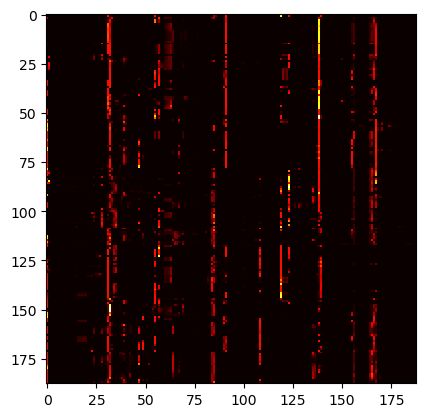

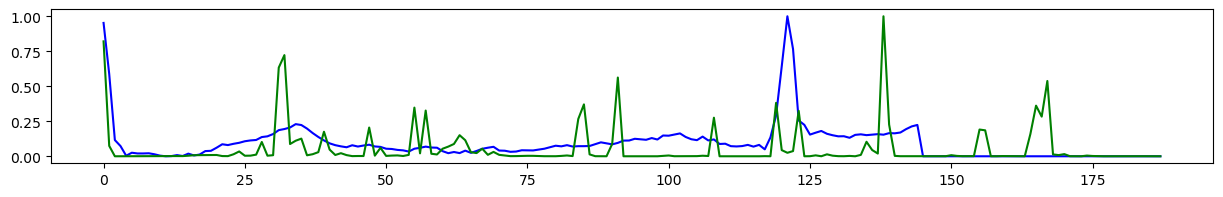

In [78]:
transformer.eval()
idx_vis = 2
x = torch.tensor(X_train[idx_vis], dtype=torch.float).unsqueeze(-1).unsqueeze(0)
#print(x)
y = transformer(x)
attention = y.attentions[-1].mean(dim=1).squeeze().detach().numpy()
plot2D_array(attention)
summed_attention = attention.sum(axis=0)
scaled_attention = summed_attention / np.max(summed_attention)
plot_array
plot_arrays([X_train[idx_vis], scaled_attention])
